In [127]:
# Library imports
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix, make_scorer
from tensorflow import keras
from tensorflow.keras.optimizers import SGD,Adagrad,Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from scipy.stats import skew

In [128]:
# Loading the dataset into Dataframe
airline_dataset = pd.read_excel("../datasets/satisfaction.xlsx")

In [129]:
data = airline_dataset.copy() # Lets create a copy so we won't disturb the original dataset 

### Preprocessing: Missing Values and Duplicates

In [130]:
#Display dataframe to check if there are missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

### From the above summary:
1. We also have 129880 data points, there are 393 missing values in the "Arrival Delay in Minutes" column
2. There are 5 non-numeric/categorical attributes and 19 numeric attributes

In [131]:
# Filling the missing values with their corresponding mean
numeric_columns = data.select_dtypes('number').columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [132]:
data.info()   # confirm if the missing values have been filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

##### The above summary indicates there are no missing values

In [133]:
# Check for duplicates
duplicates = data.duplicated().sum()
print("Duplicate rows:", duplicates)

Duplicate rows: 0


##### There are no duplicate rows

### Exploratory Data Analysis (EDA): Visualization, Encoding, Correlations

In [134]:
# Calculate skewness for numerical columns to get an insight
skewness = data[numeric_columns].apply(skew)

print("Skewness for Numerical Columns:")
print(skewness)

Skewness for Numerical Columns:
id                                   0.000000
Age                                 -0.003606
Flight Distance                      0.466742
Seat comfort                        -0.091860
Departure/Arrival time convenient   -0.252280
Food and drink                      -0.116812
Gate location                       -0.053063
Inflight wifi service               -0.191121
Inflight entertainment              -0.604821
Online support                      -0.575358
Ease of Online booking              -0.491714
On-board service                    -0.505264
Leg room service                    -0.496434
Baggage handling                    -0.743028
Checkin service                     -0.392438
Cleanliness                         -0.755992
Online boarding                     -0.366491
Departure Delay in Minutes           6.821902
Arrival Delay in Minutes             6.680162
dtype: float64


**A high positive skewness is observed in features: 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' however overall the class is not imbalanced**

### Correlation Heatmap

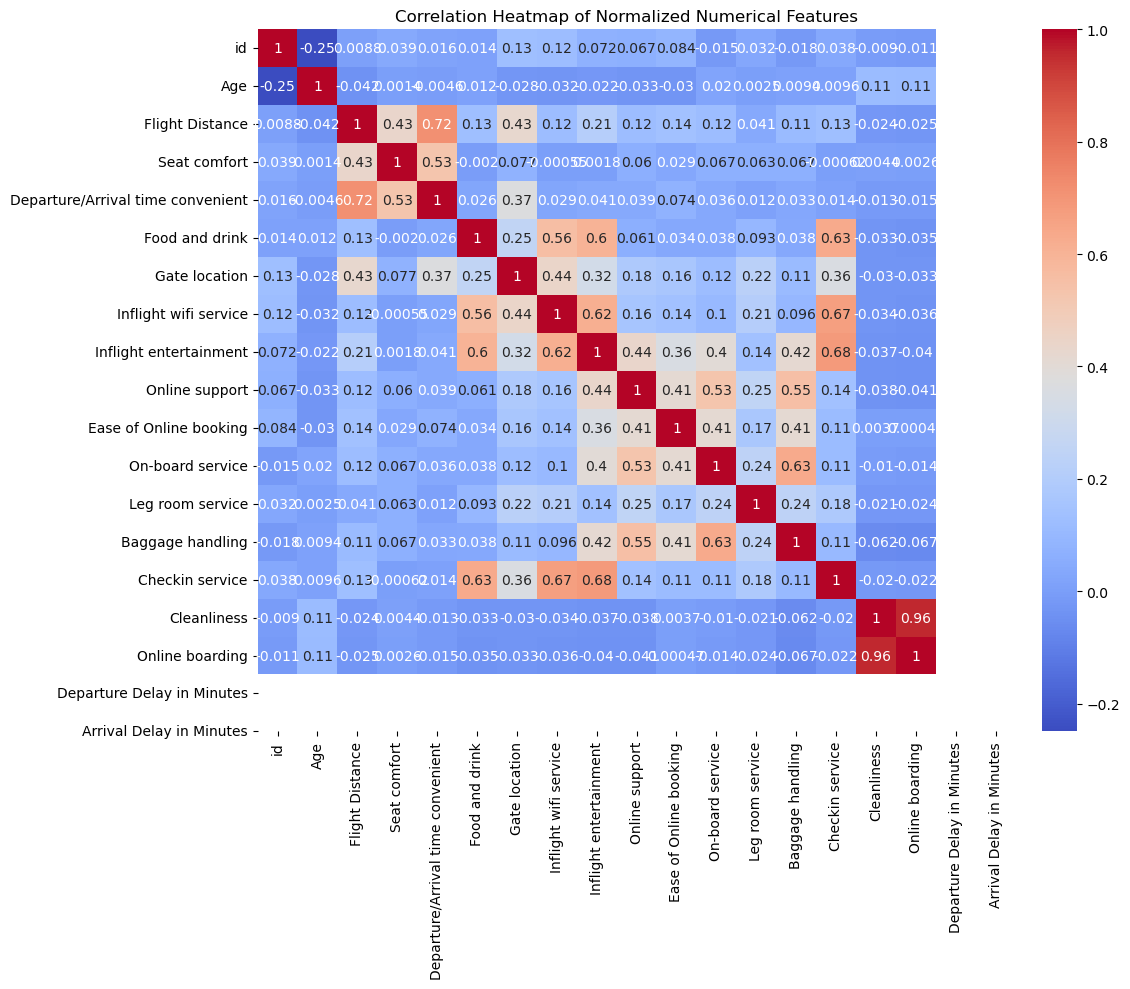

In [135]:
numerical_features = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 
                      'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                      'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
                      'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[numerical_features])

# Create correlation matrix
correlation_matrix = np.corrcoef(normalized_data.T)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=numeric_columns, yticklabels=numeric_columns)
plt.title('Correlation Heatmap of Normalized Numerical Features')
plt.tight_layout()
plt.show()

### Principal Component Analysis (PCA)

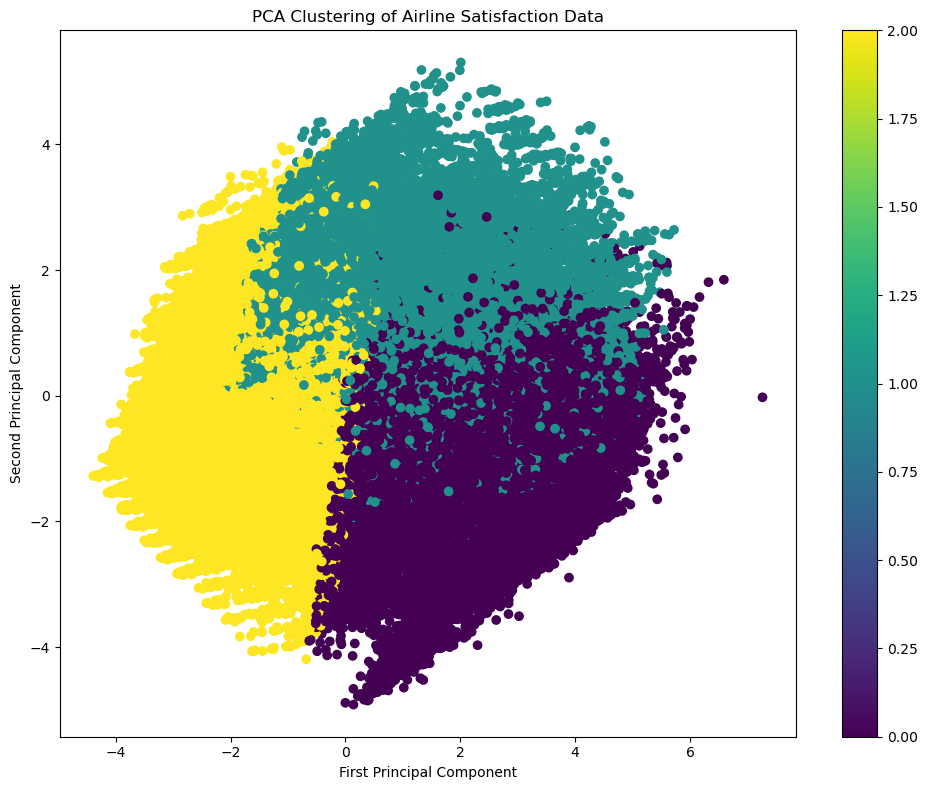

In [136]:
# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[numerical_features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_data)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA Clustering of Airline Satisfaction Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.tight_layout()
plt.show()

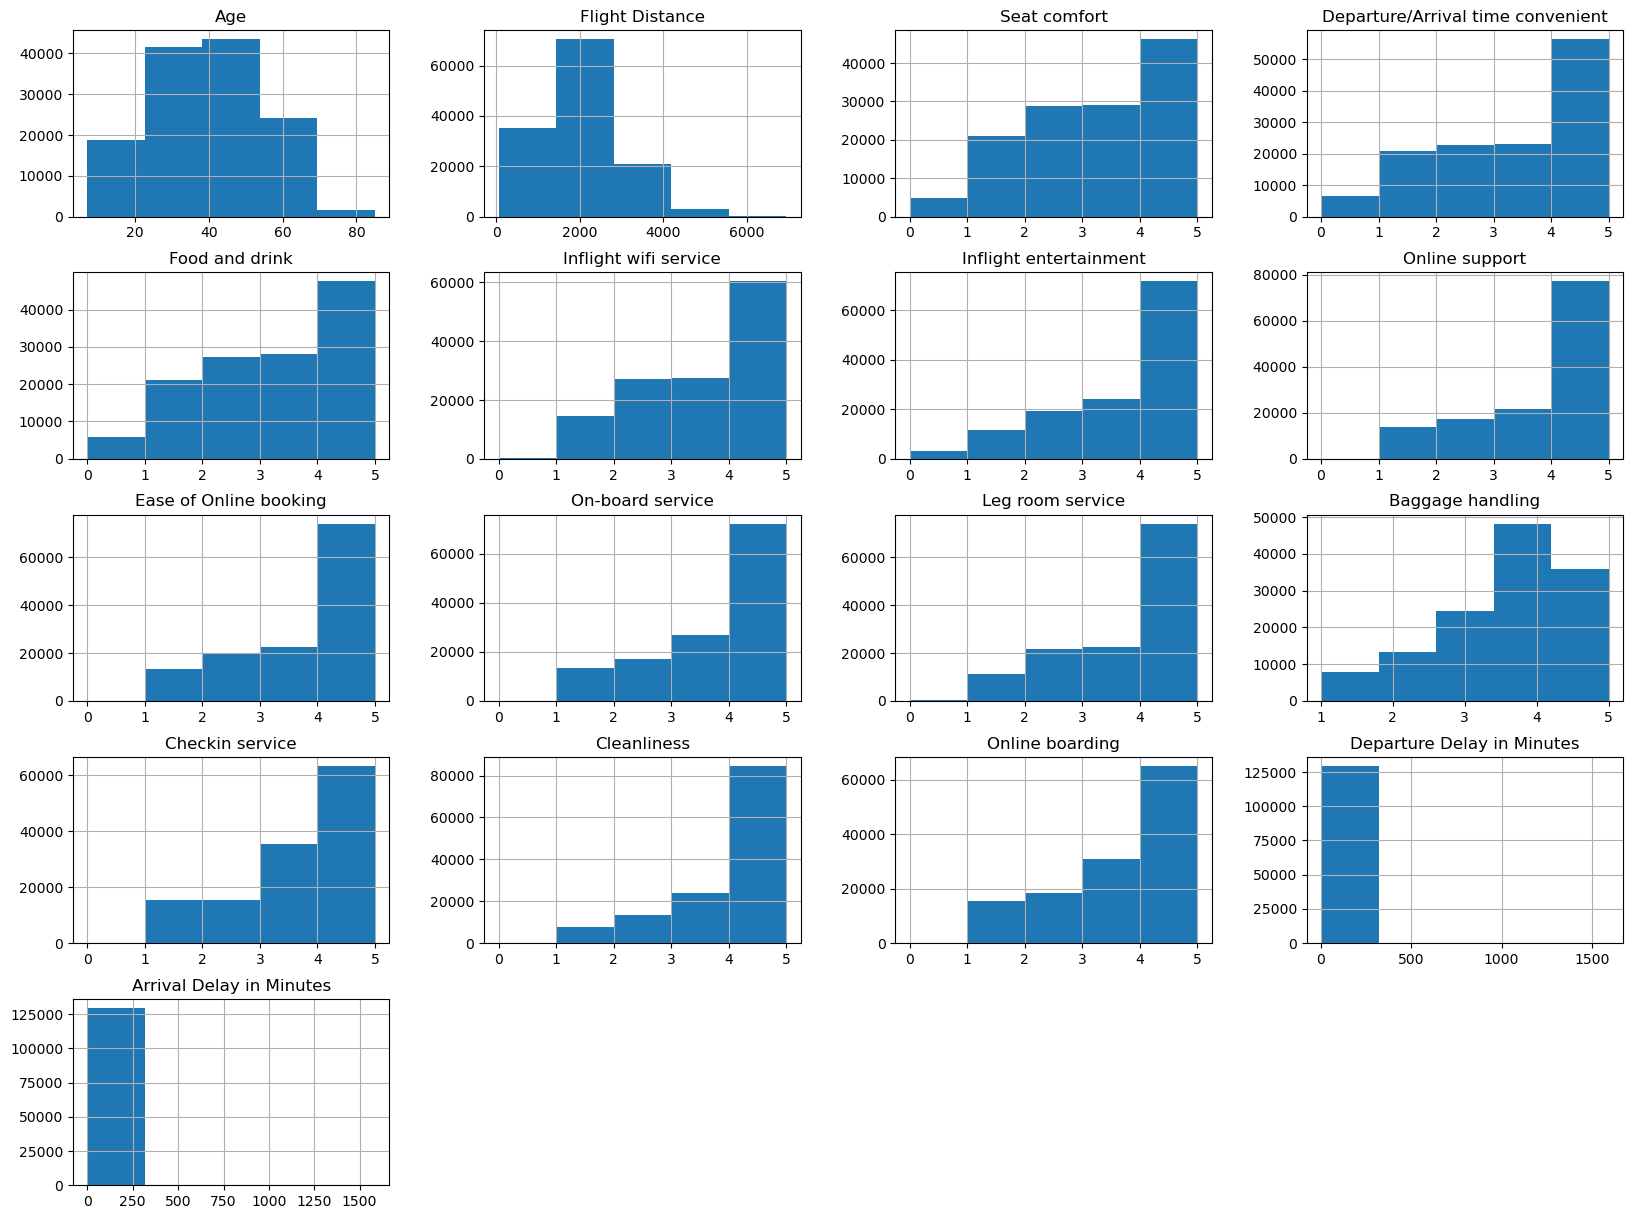

In [137]:
# plotting histogram 
data[numerical_features].hist(bins=5, figsize=(20,15))
plt.show()

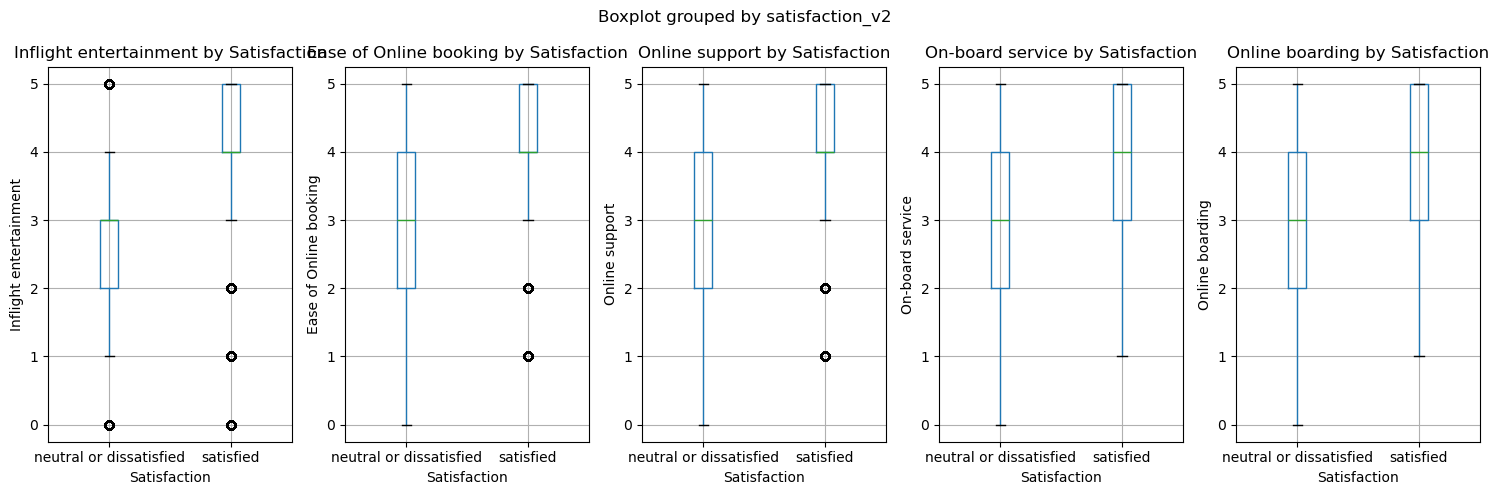

In [138]:
# Create boxplots
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

bp_features = ['Inflight entertainment', 'Ease of Online booking', 'Online support', 'On-board service', 'Online boarding']

for i, feature in enumerate(bp_features):
    data.boxplot(column=feature, by='satisfaction_v2', ax=axes[i])
    axes[i].set_title(f'{feature} by Satisfaction')
    axes[i].set_xlabel('Satisfaction')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

## Encoding & Normalization

In [139]:
#Converting categorical values to numeric values
onehot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the categirical data
data_encoded = onehot_encoder.fit_transform(data[['satisfaction_v2', 'Gender', 'Customer Type', 'Type of Travel', 'Class']])

# Converting the encoded (sparse) data to DataFrame (we will need to concatenate with numeric data)
encoded_df = pd.DataFrame(data_encoded, columns=onehot_encoder.get_feature_names_out())

# Combining encoded features with original numerical features into one DataFrame
combined_df = pd.concat([data[numeric_columns], encoded_df], axis=1)

# Separating the features and labels
X = combined_df.drop(columns=['satisfaction_v2_satisfied', 'satisfaction_v2_neutral or dissatisfied', 'id'])
y = combined_df[['satisfaction_v2_satisfied', 'satisfaction_v2_neutral or dissatisfied']]

# z-score features normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converting the scaled array back to a DataFrame for concatenation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate with the labels
normalized_df = pd.concat([X_scaled_df, y], axis=1)

In [140]:
# Prepare X and y for classification, clustering and plotting
#X = normalized_df.drop(columns=['satisfaction_v2_satisfied', 'satisfaction_v2_neutral or dissatisfied']).values
#y = np.where(normalized_df['satisfaction_v2_satisfied'] == 1, 0, 1)
#target_names = ["satisfaction_v2_satisfied", "satisfaction_v2_neutral or dissatisfied"]

## Clustering

### Elbow Method to determine the optimal number of clusters, k

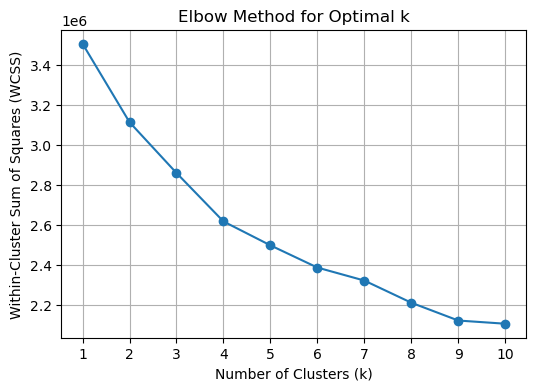

In [141]:
# Preparing features for Elbow & K-Means
features = normalized_df.drop(columns=['satisfaction_v2_satisfied', 'satisfaction_v2_neutral or dissatisfied']) 

# inertia (WCSS) values for different k values
wcss = []

# Looping over a range of k values to calculate the inertia for each (max = 11)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### K-Means (Using k = 4)

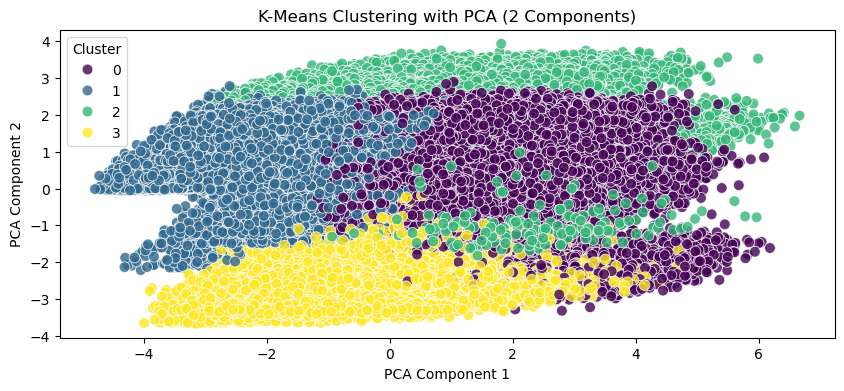

In [142]:
# Initializing and fitting the K-Means model
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(features)

# Adding the cluster labels to the data for visualization
data['cluster'] = kmeans.labels_

# Using PCA to reduce features to 2 dimensions for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)
data['pca_1'] = features_pca[:, 0]
data['pca_2'] = features_pca[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 4))
sns.scatterplot(
    x='pca_1', y='pca_2',
    hue='cluster', data=data,
    palette='viridis', s=60, alpha=0.8
)
plt.title('K-Means Clustering with PCA (2 Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

### GMM (Using k = 4)

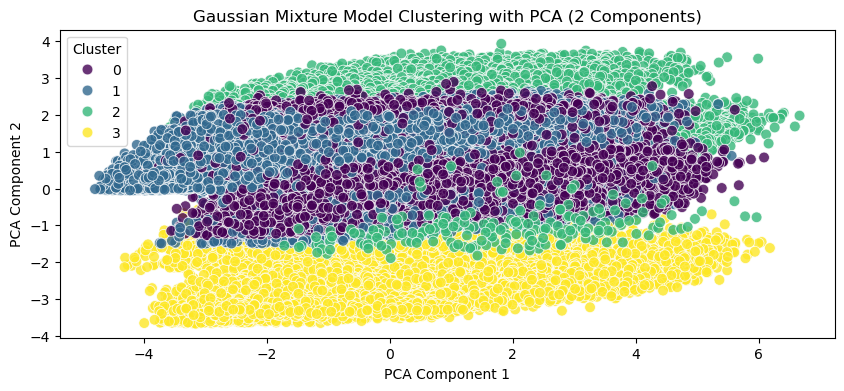

In [143]:
# Initializing and fitting the GMM model
k = 4
gmm = GaussianMixture(n_components=k, random_state=0)
gmm.fit(features)

# Predicting cluster labels
data['cluster'] = gmm.predict(features)

# Using PCA to reduce features to 2 dimensions for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)
data['pca_1'] = features_pca[:, 0]
data['pca_2'] = features_pca[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 4))
sns.scatterplot(
    x='pca_1', y='pca_2',
    hue='cluster', data=data,
    palette='viridis', s=60, alpha=0.8
)
plt.title('Gaussian Mixture Model Clustering with PCA (2 Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

**From K-Means and GMM clustering, we don't get a clear insight of the clusters as they dont show where the classes separate**

## Correlation Matrix

In [144]:
# Calculating correlation
correlation_matrix = normalized_df.corr()

# Extracting correlation with regard to satisfaction_v2_satisfied
satisfaction_correlation = correlation_matrix['satisfaction_v2_satisfied'].sort_values(ascending=False)
print("Correlation with regard to satisfaction:\n")
print(satisfaction_correlation)

Correlation with regard to satisfaction:

satisfaction_v2_satisfied                  1.000000
Inflight entertainment                     0.523496
Ease of Online booking                     0.431772
Online support                             0.390143
On-board service                           0.352047
Online boarding                            0.338147
Class_Business                             0.311912
Leg room service                           0.304928
Customer Type_Loyal Customer               0.292592
Checkin service                            0.266179
Baggage handling                           0.260347
Cleanliness                                0.259330
Seat comfort                               0.242384
Inflight wifi service                      0.227062
Gender_Female                              0.212236
Food and drink                             0.120677
Age                                        0.117971
Type of Travel_Business travel             0.109239
Gate location         

### Feature Selection (3 different datasets: 2, 5, 17 features)

In [145]:
# Since our dataset has 2 classes only we will use Pearson correlation coefficient
# 2 best features
df2 = normalized_df.corr()["satisfaction_v2_satisfied"].sort_values(ascending=False)[1:]

# Absolute for positive values
abs_corr = abs(df2)

# Threshold for features to keep
best2 = abs_corr[abs_corr>0.4].index.tolist()

# Create a DataFrame excluding the target features
best2 = [feature for feature in best2 if feature != 'satisfaction_v2_neutral or dissatisfied']
#best2

# 5 best features
df5 = normalized_df.corr()["satisfaction_v2_satisfied"].sort_values(ascending=False)[1:]

# Absolute for positive values
abs_corr = abs(df5)

# Threshold for features to keep
best5 = abs_corr[abs_corr>0.33].index.tolist()

# Create a DataFrame excluding the target feature
best5 = [feature for feature in best5 if feature != 'satisfaction_v2_neutral or dissatisfied']
#best5

# 17 best features
df17 = normalized_df.corr()["satisfaction_v2_satisfied"].sort_values(ascending=False)[1:]

# Absolute for positive values
abs_corr = abs(df17)

# Threshold for features to keep
best17 = abs_corr[abs_corr>0.2].index.tolist()

# Create a DataFrame excluding the target feature
best17 = [feature for feature in best17 if feature != 'satisfaction_v2_neutral or dissatisfied']
# best17

## Baseline Model Training & Testing

In [146]:
# Function for testing the models
def test_model_score(y_pred, y_pred_proba, train_score, test_score, X_test, y_test, X_train, y_train):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_proba)

    print("Training score: {:.2f}".format(train_score))
    print("Test score / Accuracy: {:.2f}".format(test_score))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("ROC Area under Curve: {:.2f}".format(roc))

### K-Nearest Neighbors (KNN)

In [147]:
# Training using the best 2 features
X = normalized_df[best2]
y = normalized_df['satisfaction_v2_satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:,1]
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

test_model_score(y_pred, y_pred_proba, train_score, test_score, X_test, y_test, X_train, y_train)

Training score: 0.81
Test score / Accuracy: 0.81
Precision: 0.87
Recall: 0.77
ROC Area under Curve: 0.86


In [148]:
# Training using the best 5 features
X = normalized_df[best5]
y = normalized_df['satisfaction_v2_satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:,1]
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

test_model_score(y_pred, y_pred_proba, train_score, test_score, X_test, y_test, X_train, y_train)

Training score: 0.87
Test score / Accuracy: 0.86
Precision: 0.88
Recall: 0.87
ROC Area under Curve: 0.92


In [149]:
# Training using the best 17 features
X = normalized_df[best17]
y = normalized_df['satisfaction_v2_satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:,1]
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

test_model_score(y_pred, y_pred_proba, train_score, test_score, X_test, y_test, X_train, y_train)

Training score: 0.93
Test score / Accuracy: 0.91
Precision: 0.93
Recall: 0.89
ROC Area under Curve: 0.96


From the baseline model evaluation above, using 17 features yielded the best results hence, we will be using these features or more on the next models i.e. Neural Networks

### Decision Trees

First lets test out the ideal maximum depth for the DecisionTree

Training score: 0.83
Test score / Accuracy: 0.82
Precision: 0.80
Recall: 0.89
ROC Area under Curve: 0.86


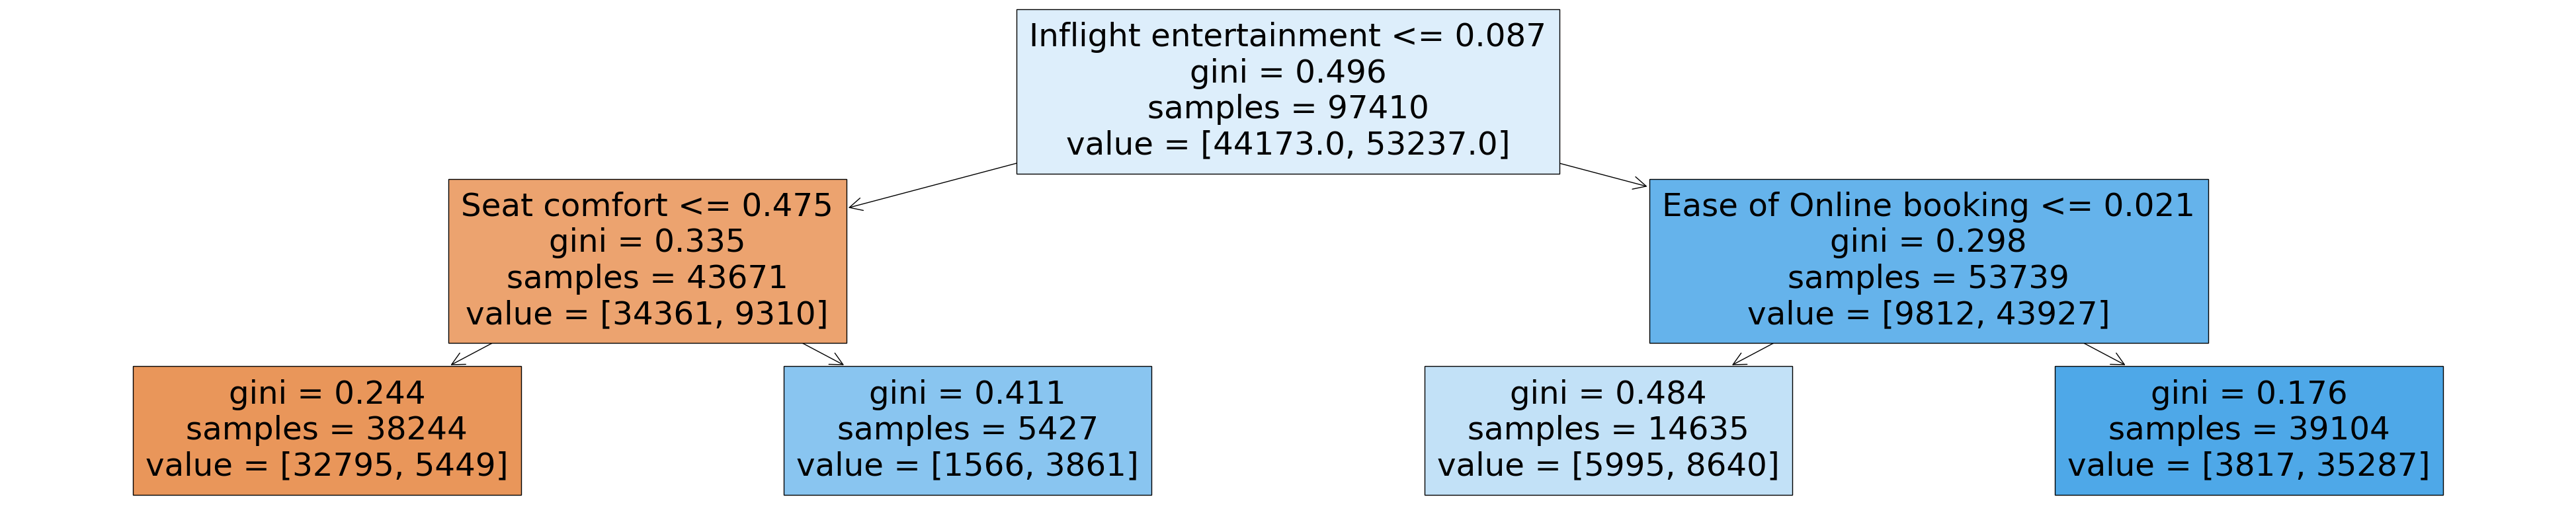

In [150]:
# Best 2 features
dTree = DecisionTreeClassifier(max_depth=2, random_state=10)
dTree.fit(X_train, y_train)

fig = plt.figure(figsize=(50,10))
plot_tree(dTree, feature_names=X_train.columns,filled=True)

y_pred = dTree.predict(X_test)
y_pred_proba = dTree.predict_proba(X_test)[:,1]
train_score = dTree.score(X_train, y_train)
test_score = dTree.score(X_test, y_test)

test_model_score(y_pred, y_pred_proba, train_score, test_score, X_test, y_test, X_train, y_train)

In [151]:
# Best 5 features
dTree = DecisionTreeClassifier(max_depth=5, random_state=10)
dTree.fit(X_train, y_train)

y_pred = dTree.predict(X_test)
y_pred_proba = dTree.predict_proba(X_test)[:,1]
train_score = dTree.score(X_train, y_train)
test_score = dTree.score(X_test, y_test)

test_model_score(y_pred, y_pred_proba, train_score, test_score, X_test, y_test, X_train, y_train)

Training score: 0.87
Test score / Accuracy: 0.87
Precision: 0.91
Recall: 0.85
ROC Area under Curve: 0.94


In [152]:
# Best 17 features
dTree = DecisionTreeClassifier(max_depth=17, random_state=10)
dTree.fit(X_train, y_train)

y_pred = dTree.predict(X_test)
y_pred_proba = dTree.predict_proba(X_test)[:,1]
train_score = dTree.score(X_train, y_train)
test_score = dTree.score(X_test, y_test)

test_model_score(y_pred, y_pred_proba, train_score, test_score, X_test, y_test, X_train, y_train)

Training score: 0.96
Test score / Accuracy: 0.93
Precision: 0.94
Recall: 0.93
ROC Area under Curve: 0.96


From the Decision Tree score the ideal maximum depth would be 17

In [153]:
# Finding the most important features using feature_importances_
features = dTree.feature_importances_
print(features)

[0.4406356  0.08152336 0.02681612 0.01709357 0.015907   0.02510199
 0.02899205 0.01186793 0.02507649 0.02498554 0.02194353 0.20857704
 0.01263038 0.00649712 0.01057259 0.00198465 0.03979503]


In [154]:
#labelling the features with their actual values
value_labeled = {}
for i in range(0, len(features)):
    f_str = str(X_test.columns[i])
    value_labeled[f_str] = features[i]

#Sort the features from most important to least important
sorted_feat = dict(sorted(value_labeled.items() , key=lambda feature:feature[1], reverse=True))
print("Top 3 features are:", *(list(sorted_feat.keys())[:3]), sep="\n")

Top 3 features are:
Inflight entertainment
Seat comfort
Ease of Online booking


### Logistic Regression

In [155]:
# Best 2 features
X = normalized_df[best2]
y = normalized_df['satisfaction_v2_satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(random_state=0, max_iter=100)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)

print("Best 2 features")
test_model_score(y_pred, y_pred_proba, train_score, test_score, X_test, y_test, X_train, y_train)
print("")

# Best 5 features
X = normalized_df[best5]
y = normalized_df['satisfaction_v2_satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(random_state=0, max_iter=100)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)

print("Best 5 features")
test_model_score(y_pred, y_pred_proba, train_score, test_score, X_test, y_test, X_train, y_train)
print("")

# Best 17 features
model=LogisticRegression(random_state=42, max_iter=300)
X = normalized_df[best17]
y = normalized_df['satisfaction_v2_satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(random_state=0, max_iter=100,C=0.01)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)

print("Best 17 features")
test_model_score(y_pred, y_pred_proba, train_score, test_score, X_test, y_test, X_train, y_train)

Best 2 features
Training score: 0.79
Test score / Accuracy: 0.79
Precision: 0.80
Recall: 0.82
ROC Area under Curve: 0.86

Best 5 features
Training score: 0.79
Test score / Accuracy: 0.79
Precision: 0.80
Recall: 0.82
ROC Area under Curve: 0.87

Best 17 features
Training score: 0.83
Test score / Accuracy: 0.83
Precision: 0.84
Recall: 0.84
ROC Area under Curve: 0.90


**Among the 3 baseline models: Decision tree has the highest score: 93%, followed by KNN: 91% and Logistic Regerssion: 83%**

## R5: Multi Layer Perceptron (MLP)

In [156]:
# Training using best 17 features
X = normalized_df[best17]
y = normalized_df['satisfaction_v2_satisfied']
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, random_state=0,test_size=0.3) 
x_valid, X_test, y_valid, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)
model = keras.models.Sequential([
    keras.layers.Input(shape=(17,)), 
    keras.layers.Dense(32, activation="tanh"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(2, activation="sigmoid")
])

model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_93 (Dense)                     │ (None, 32)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,138 (4.45 KB)

 Trainable params: 1,138 (4.45 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
training_history = model.fit(X_train, y_train, epochs=5,batch_size=12,validation_data=(x_valid,y_valid))

Epoch 1/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8487 - loss: 0.3506 - val_accuracy: 0.8996 - val_loss: 0.2440
Epoch 2/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9017 - loss: 0.2354 - val_accuracy: 0.9096 - val_loss: 0.2200
Epoch 3/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9118 - loss: 0.2128 - val_accuracy: 0.9125 - val_loss: 0.2096
Epoch 4/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9143 - loss: 0.2053 - val_accuracy: 0.9157 - val_loss: 0.2063
Epoch 5/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9162 - loss: 0.2026 - val_accuracy: 0.9186 - val_loss: 0.1991


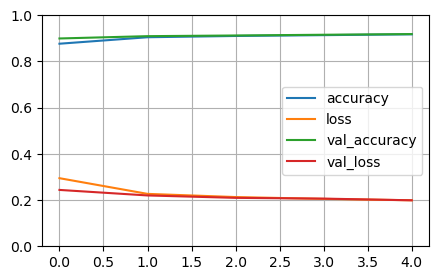

In [158]:
pd.DataFrame(training_history .history).plot(figsize=(5, 3))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [159]:
# Model evaluation
model.evaluate(X_test,y_test)
y_pred=model.predict(X_test)
y_predc=np.argmax(y_pred,axis=1)

print(f'Accuracy:{accuracy_score(y_test,y_predc):.2f}')
print(f'Recall:{recall_score(y_test,y_predc):.2f}')
print(f'Precision:{precision_score(y_test, y_predc):.2f}')

609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.9161 - loss: 0.1963
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step
Accuracy:0.92
Recall:0.93
Precision:0.92


In [160]:
# Training on best 5 features
X = normalized_df[best5]
y = normalized_df['satisfaction_v2_satisfied']
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, random_state=0,test_size=0.3) 
x_valid, X_test, y_valid, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)
model = keras.models.Sequential([
    keras.layers.Input(shape=(5,)), 
    keras.layers.Dense(16, activation="tanh"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(2, activation="sigmoid")
])

model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                     │ (None, 16)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250 (1000.00 B)

 Trainable params: 250 (1000.00 B)

 Non-trainable params: 0 (0.00 B)

In [161]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
training_history  = model.fit(X_train, y_train, epochs=5,batch_size=12,validation_data=(x_valid,y_valid))

Epoch 1/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8032 - loss: 0.4395 - val_accuracy: 0.8441 - val_loss: 0.3744
Epoch 2/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8478 - loss: 0.3652 - val_accuracy: 0.8497 - val_loss: 0.3561
Epoch 3/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8547 - loss: 0.3505 - val_accuracy: 0.8581 - val_loss: 0.3452
Epoch 4/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8622 - loss: 0.3389 - val_accuracy: 0.8645 - val_loss: 0.3356
Epoch 5/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8647 - loss: 0.3313 - val_accuracy: 0.8652 - val_loss: 0.3322


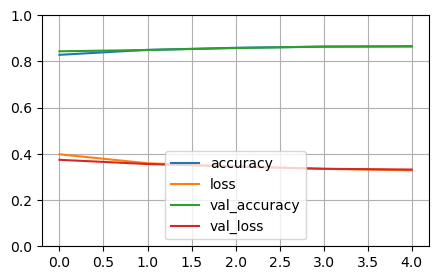

In [162]:
pd.DataFrame(training_history.history).plot(figsize=(5, 3))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [163]:
# Model evaluation
model.evaluate(X_test,y_test)
y_pred=model.predict(X_test)
y_predc=np.argmax(y_pred,axis=1)

print(f'Accuracy:{accuracy_score(y_test,y_predc):.2f}')
print(f'Recall:{recall_score(y_test,y_predc):.2f}')
print(f'Precision:{precision_score(y_test, y_predc):.2f}')

609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8663 - loss: 0.3311
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step
Accuracy:0.87
Recall:0.87
Precision:0.88


In [164]:
# Training on best 2 features
X = normalized_df[best2]
y = normalized_df['satisfaction_v2_satisfied']
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, random_state=0,test_size=0.3) 
x_valid, X_test, y_valid, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)
model = keras.models.Sequential([
    keras.layers.Input(shape=(2,)), 
    keras.layers.Dense(32, activation="tanh"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(2, activation="sigmoid")
])

model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                     │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 658 (2.57 KB)

 Trainable params: 658 (2.57 KB)

 Non-trainable params: 0 (0.00 B)

In [165]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
training_history  = model.fit(X_train, y_train, epochs=5,batch_size=12,validation_data=(x_valid,y_valid))

Epoch 1/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7947 - loss: 0.4555 - val_accuracy: 0.8164 - val_loss: 0.4178
Epoch 2/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8185 - loss: 0.4166 - val_accuracy: 0.8141 - val_loss: 0.4189
Epoch 3/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8196 - loss: 0.4114 - val_accuracy: 0.8164 - val_loss: 0.4178
Epoch 4/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8182 - loss: 0.4126 - val_accuracy: 0.8164 - val_loss: 0.4168
Epoch 5/5
7577/7577 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8210 - loss: 0.4102 - val_accuracy: 0.8152 - val_loss: 0.4186


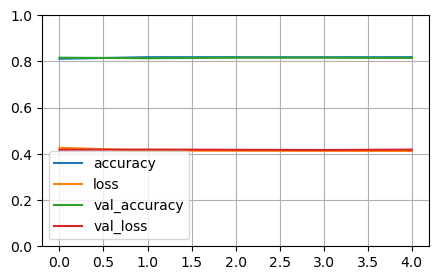

In [166]:
pd.DataFrame(training_history .history).plot(figsize=(5, 3))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [167]:
# Model evaluation
model.evaluate(X_test,y_test)
y_pred=model.predict(X_test)
y_predc=np.argmax(y_pred,axis=1)

print(f'Accuracy:{accuracy_score(y_test,y_predc):.2f}')
print(f'Recall:{recall_score(y_test,y_predc):.2f}')
print(f'Precision:{precision_score(y_test, y_predc):.2f}')

609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8183 - loss: 0.4104
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step
Accuracy:0.82
Recall:0.79
Precision:0.86


### Taking into account all features

In [168]:
X = normalized_df.drop(columns=['satisfaction_v2_satisfied', 'satisfaction_v2_neutral or dissatisfied'])
y = normalized_df['satisfaction_v2_satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

training_history  = model.fit(X_train, y_train, 
                    epochs=5, 
                    batch_size=32, 
                    validation_split=0.2,
                    verbose=1)

Epoch 1/5
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8925 - loss: 0.2651 - val_accuracy: 0.9342 - val_loss: 0.1556
Epoch 2/5
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9372 - loss: 0.1477 - val_accuracy: 0.9414 - val_loss: 0.1373
Epoch 3/5
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9439 - loss: 0.1279 - val_accuracy: 0.9433 - val_loss: 0.1280
Epoch 4/5
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9480 - loss: 0.1190 - val_accuracy: 0.9453 - val_loss: 0.1235
Epoch 5/5
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9491 - loss: 0.1158 - val_accuracy: 0.9471 - val_loss: 0.1183


In [169]:
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)                    │ (None, 64)                  │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,253 (51.77 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,836 (34.52 KB)

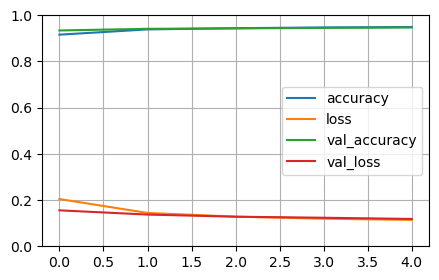

In [170]:
pd.DataFrame(training_history .history).plot(figsize=(5, 3))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [171]:
# Model evaluation
model.evaluate(X_test, y_test)
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred):.2f}')

812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9467 - loss: 0.1162
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.95
Recall: 0.95
Precision: 0.95


### K-Fold Validation using all features

In [172]:
X = normalized_df.drop(columns=['satisfaction_v2_satisfied', 'satisfaction_v2_neutral or dissatisfied'])
y = normalized_df['satisfaction_v2_satisfied']

# model creation function
def create_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# setting up the k-fold cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# lists storing performance metrics
accuracies = []
precisions = []
recalls = []
roc_aucs = []

# performing k-fold cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
    print(f"Fold {fold}")
    
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model = create_model((X_train.shape[1],))
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
    
    y_pred = model.predict(X_val)
    y_pred_classes = (y_pred > 0.5).astype(int)
    
    # calculating the performance metrics
    accuracy = accuracy_score(y_val, y_pred_classes)
    precision = precision_score(y_val, y_pred_classes)
    recall = recall_score(y_val, y_pred_classes)
    roc_auc = roc_auc_score(y_val, y_pred)
    
    # sttoring the metrics
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    roc_aucs.append(roc_auc)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print()

# calculate and printing the average performance across all the folds
print("Average performance across all folds:")
print(f"Accuracy: {np.mean(accuracies):.2f} (+/- {np.std(accuracies):.2f})")
print(f"Precision: {np.mean(precisions):.2f} (+/- {np.std(precisions):.2f})")
print(f"Recall: {np.mean(recalls):.2f} (+/- {np.std(recalls):.2f})")
print(f"ROC AUC: {np.mean(roc_aucs):.2f} (+/- {np.std(roc_aucs):.2f})")

Fold 1
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step
Accuracy: 0.94
Precision: 0.94
Recall: 0.96
ROC AUC: 0.99

Fold 2
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step
Accuracy: 0.95
Precision: 0.95
Recall: 0.96
ROC AUC: 0.99

Fold 3
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step
Accuracy: 0.95
Precision: 0.97
Recall: 0.94
ROC AUC: 0.99

Fold 4
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step
Accuracy: 0.95
Precision: 0.96
Recall: 0.95
ROC AUC: 0.99

Fold 5
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step
Accuracy: 0.95
Precision: 0.98
Recall: 0.93
ROC AUC: 0.99

Average performance across all folds:
Accuracy: 0.95 (+/- 0.00)
Precision: 0.96 (+/- 0.01)
Recall: 0.95 (+/- 0.01)
ROC AUC: 0.99 (+/- 0.00)
